In [5]:
#https://raw.githubusercontent.com/ankane/age/master/names/yob1880.txt
#http://www.ssa.gov/oact/babynames/limits.html
import pandas as pd
import numpy as np

In [6]:
#파일 읽기
names1880 = pd.read_csv('names/yob1880.txt', names = ['name', 'sex', 'births'])

In [7]:
#names1880
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [8]:
#성별을 기준으로 출생수 합
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [9]:
#년도별로 데이터 취합
years = range(1880, 2015)

pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)

In [10]:
names[-10:]

,name,sex,births,year
1825423,Ziyang,M,5,2014
1825424,Zmarion,M,5,2014
1825425,Zo,M,5,2014
1825426,Zyeir,M,5,2014
1825427,Zyel,M,5,2014
1825428,Zykeem,M,5,2014
1825429,Zymeer,M,5,2014
1825430,Zymiere,M,5,2014
1825431,Zyran,M,5,2014
1825432,Zyrin,M,5,2014


In [12]:
#연도별 성별에 따른 출생수
total_births = names.pivot_table(values = 'births', index = 'year', columns = 'sex', aggfunc = sum )

In [13]:
#total_births[-10:]
total_births.tail()

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


In [14]:
def add_prop(group):
    #python3에서는 실수형 변환 안해도 됨
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

In [15]:
#prop열을 추가하여 각 이름의 전체 출생수에서 차지하는 비율 계산
names = names.groupby(['year','sex']).apply(add_prop)

In [16]:
#prop 합이 1이 맞는지 확인
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [17]:
#각연도별, 성별에 따른 빈도수가 높은 이름 1000개 추출
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

In [18]:
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [19]:
top1000[:10]

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188
         5   Margaret   F    1578  1880  0.017342
         6        Ida   F    1472  1880  0.016177
         7      Alice   F    1414  1880  0.015540
         8     Bertha   F    1320  1880  0.014507
         9      Sarah   F    1288  1880  0.014155

In [20]:
#상위 1000개의 이름을 남자/여자로 분리
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [21]:
#연도와 이름에 대한 전체 출생수
total_births = top1000.pivot_table(values='births', index='year', columns='name', aggfunc=sum)

In [22]:
total_births

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,...,11,42,NaN,NaN,23,7,30,42,45,NaN


In [23]:
#4개의 이름을 추출
subset = total_births[['John','Harry','Mary','Marilyn']]

In [32]:
subset

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701,2158,7092,NaN
1881,8795,2002,6948,NaN
1882,9597,2246,8178,NaN
1883,8934,2116,8044,NaN
1884,9428,2338,9253,NaN
1885,8801,2209,9166,NaN
1886,9074,2272,9922,NaN
1887,8166,2070,9935,NaN
1888,9300,2772,11804,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BBA5C50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B790EB8>], dtype=object)

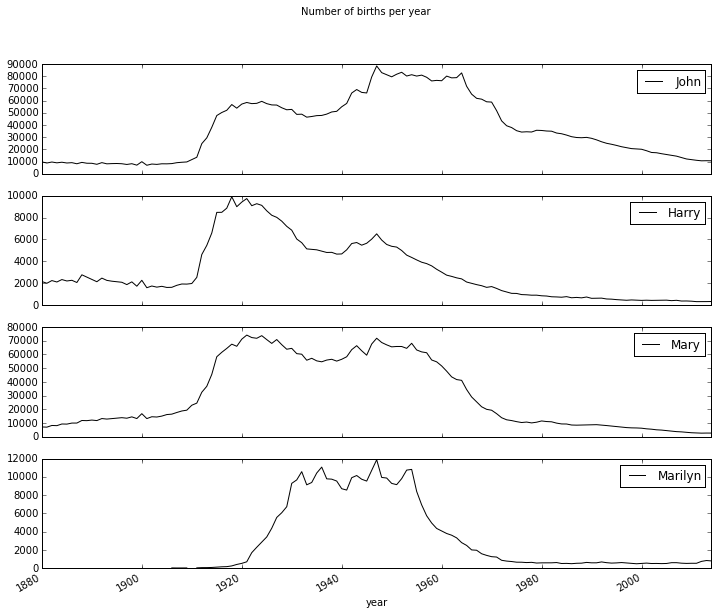

In [25]:
%matplotlib inline  
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

In [33]:
#1000개의 이름이 전체 출생수에서 차지하는 비율
table = top1000.pivot_table(values= 'prop', index='year', columns='sex', aggfunc=sum)

In [40]:
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


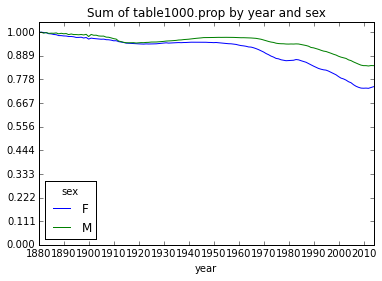

In [41]:
#1000개의 이름이 가지고 있는 비율
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0,1.0,10), xticks=range(1880,2020,10))

In [46]:
#2010년도 남자애들 이름을 추출
df = boys[boys.year == 2010]

In [54]:
df

name sex  births  year      prop
year sex                                                 
2010 M   1677392        Jacob   M   22082  2010  0.011538
         1677393        Ethan   M   17985  2010  0.009397
         1677394      Michael   M   17308  2010  0.009044
         1677395       Jayden   M   17152  2010  0.008962
         1677396      William   M   17030  2010  0.008898
         1677397    Alexander   M   16742  2010  0.008748
         1677398         Noah   M   16428  2010  0.008584
         1677399       Daniel   M   15815  2010  0.008263
         1677400        Aiden   M   15516  2010  0.008107
         1677401      Anthony   M   15470  2010  0.008083
         1677402       Joshua   M   15410  2010  0.008052
         1677403        Mason   M   14831  2010  0.007749
         1677404  Christopher   M   14243  2010  0.007442
         1677405       Andrew   M   14221  2010  0.007431
         1677406        David   M   14171  2010  0.007404
         1677407      Matthew   M   14099  2010  0.007367
         1677408        Logan   M   14012  2010  0.007321
         1677409       Elijah   M   13867  2010  0.007246
         1677410        James   M   13852  2010  0.007238
         1677411       Joseph   M   13798  2010  0.007210
         1677412      Gabriel   M   12854  2010  0.006716
         1677413     Benjamin   M   12417  2010  0.006488
         1677414         Ryan   M   11963  2010  0.006251
         1677415       Samuel   M   11939  2010  0.006238
         1677416      Jackson   M   11804  2010  0.006168
         1677417         John   M   11539  2010  0.006029
         1677418       Nathan   M   11365  2010  0.005938
         1677419     Jonathan   M   11103  2010  0.005801
         1677420    Christian   M   11080  2010  0.005789
         1677421         Liam   M   10921  2010  0.005706
...                       ...  ..     ...   ...       ...
         1678362       Lathan   M     203  2010  0.000106
         1678361         Kael   M     203  2010  0.000106
         1678360     Demarion   M     203  2010  0.000106
         1678365       Gibson   M     202  2010  0.000106
         1678367       Reagan   M     202  2010  0.000106
         1678366        Keyon   M     202  2010  0.000106
         1678368     Kingsley   M     201  2010  0.000105
         1678369        Talan   M     201  2010  0.000105
         1678370       Yehuda   M     201  2010  0.000105
         1678371    Cristofer   M     200  2010  0.000105
         1678372      Dashawn   M     200  2010  0.000105
         1678373       Daylen   M     200  2010  0.000105
         1678374       Jordon   M     200  2010  0.000105
         1678375      Sheldon   M     200  2010  0.000105
         1678379        Rowen   M     199  2010  0.000104
         1678380        Slade   M     199  2010  0.000104
         1678377        Kadin   M     199  2010  0.000104
         1678378        Masen   M     199  2010  0.000104
         1678376     Clarence   M     199  2010  0.000104
         1678381       Dillan   M     198  2010  0.000103
         1678382     Thaddeus   M     198  2010  0.000103
         1678383       Yousef   M     198  2010  0.000103
         1678384      Clinton   M     197  2010  0.000103
         1678385       Truman   M     197  2010  0.000103
         1678390      Keshawn   M     196  2010  0.000102
         1678392       Simeon   M     196  2010  0.000102
         1678391       Reuben   M     196  2010  0.000102
         1678388        Enoch   M     196  2010  0.000102
         1678389       Joziah   M     196  2010  0.000102
         1678387      Eliezer   M     196  2010  0.000102

[1000 rows x 5 columns]

In [58]:
#각 이름별 비율 누적저장
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()

In [59]:
prop_cumsum

year  sex         
2010  M    1677392    0.011538
           1677393    0.020935
           1677394    0.029979
           1677395    0.038941
           1677396    0.047839
           1677397    0.056587
           1677398    0.065171
           1677399    0.073434
           1677400    0.081541
           1677401    0.089625
           1677402    0.097676
           1677403    0.105426
           1677404    0.112868
           1677405    0.120298
           1677406    0.127703
           1677407    0.135070
           1677408    0.142391
           1677409    0.149637
           1677410    0.156874
           1677411    0.164084
           1677412    0.170800
           1677413    0.177288
           1677414    0.183539
           1677415    0.189777
           1677416    0.195945
           1677417    0.201974
           1677418    0.207912
           1677419    0.213714
           1677420    0.219503
           1677421    0.225209
                        ...   
           1678363  

In [61]:
#이름 비율의 50%정도까지 개수 개산
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [62]:
df1 = boys[boys.year == 1900]

In [66]:
in1900 = df1.sort_index(by='prop', ascending=False).prop.cumsum()

In [67]:
in1900.searchsorted(0.5)

array([24], dtype=int64)